In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import numpy as np
import healpy as hp

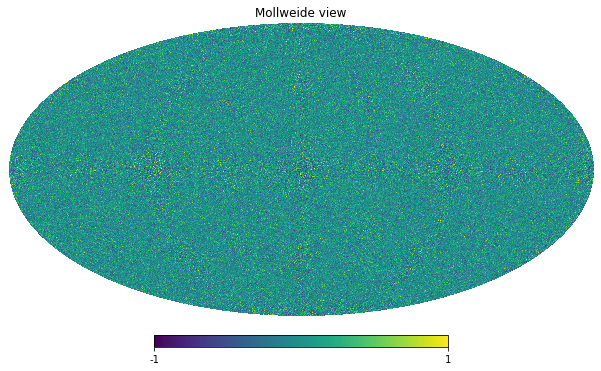

In [3]:
overdensity256 = hp.read_map("MAPS/overdensity_NS_2048_R_4096_P_2048_DV_256.fits")
overdensity128 = hp.read_map("MAPS/overdensity_NS_1024_R_2048_P_1280_DV_128.fits")
overdensityS5 = hp.read_map("MAPS/overdensity_NS_2048_R_4096_P_1536_DV_256.fits")
hp.mollview(overdensityS5,xsize=6400, max=1)

In [4]:
psOver128 = hp.sphtfunc.anafast(overdensity128)
psOver256 = hp.sphtfunc.anafast(overdensity256)
psOverS5 = hp.sphtfunc.anafast(overdensityS5)

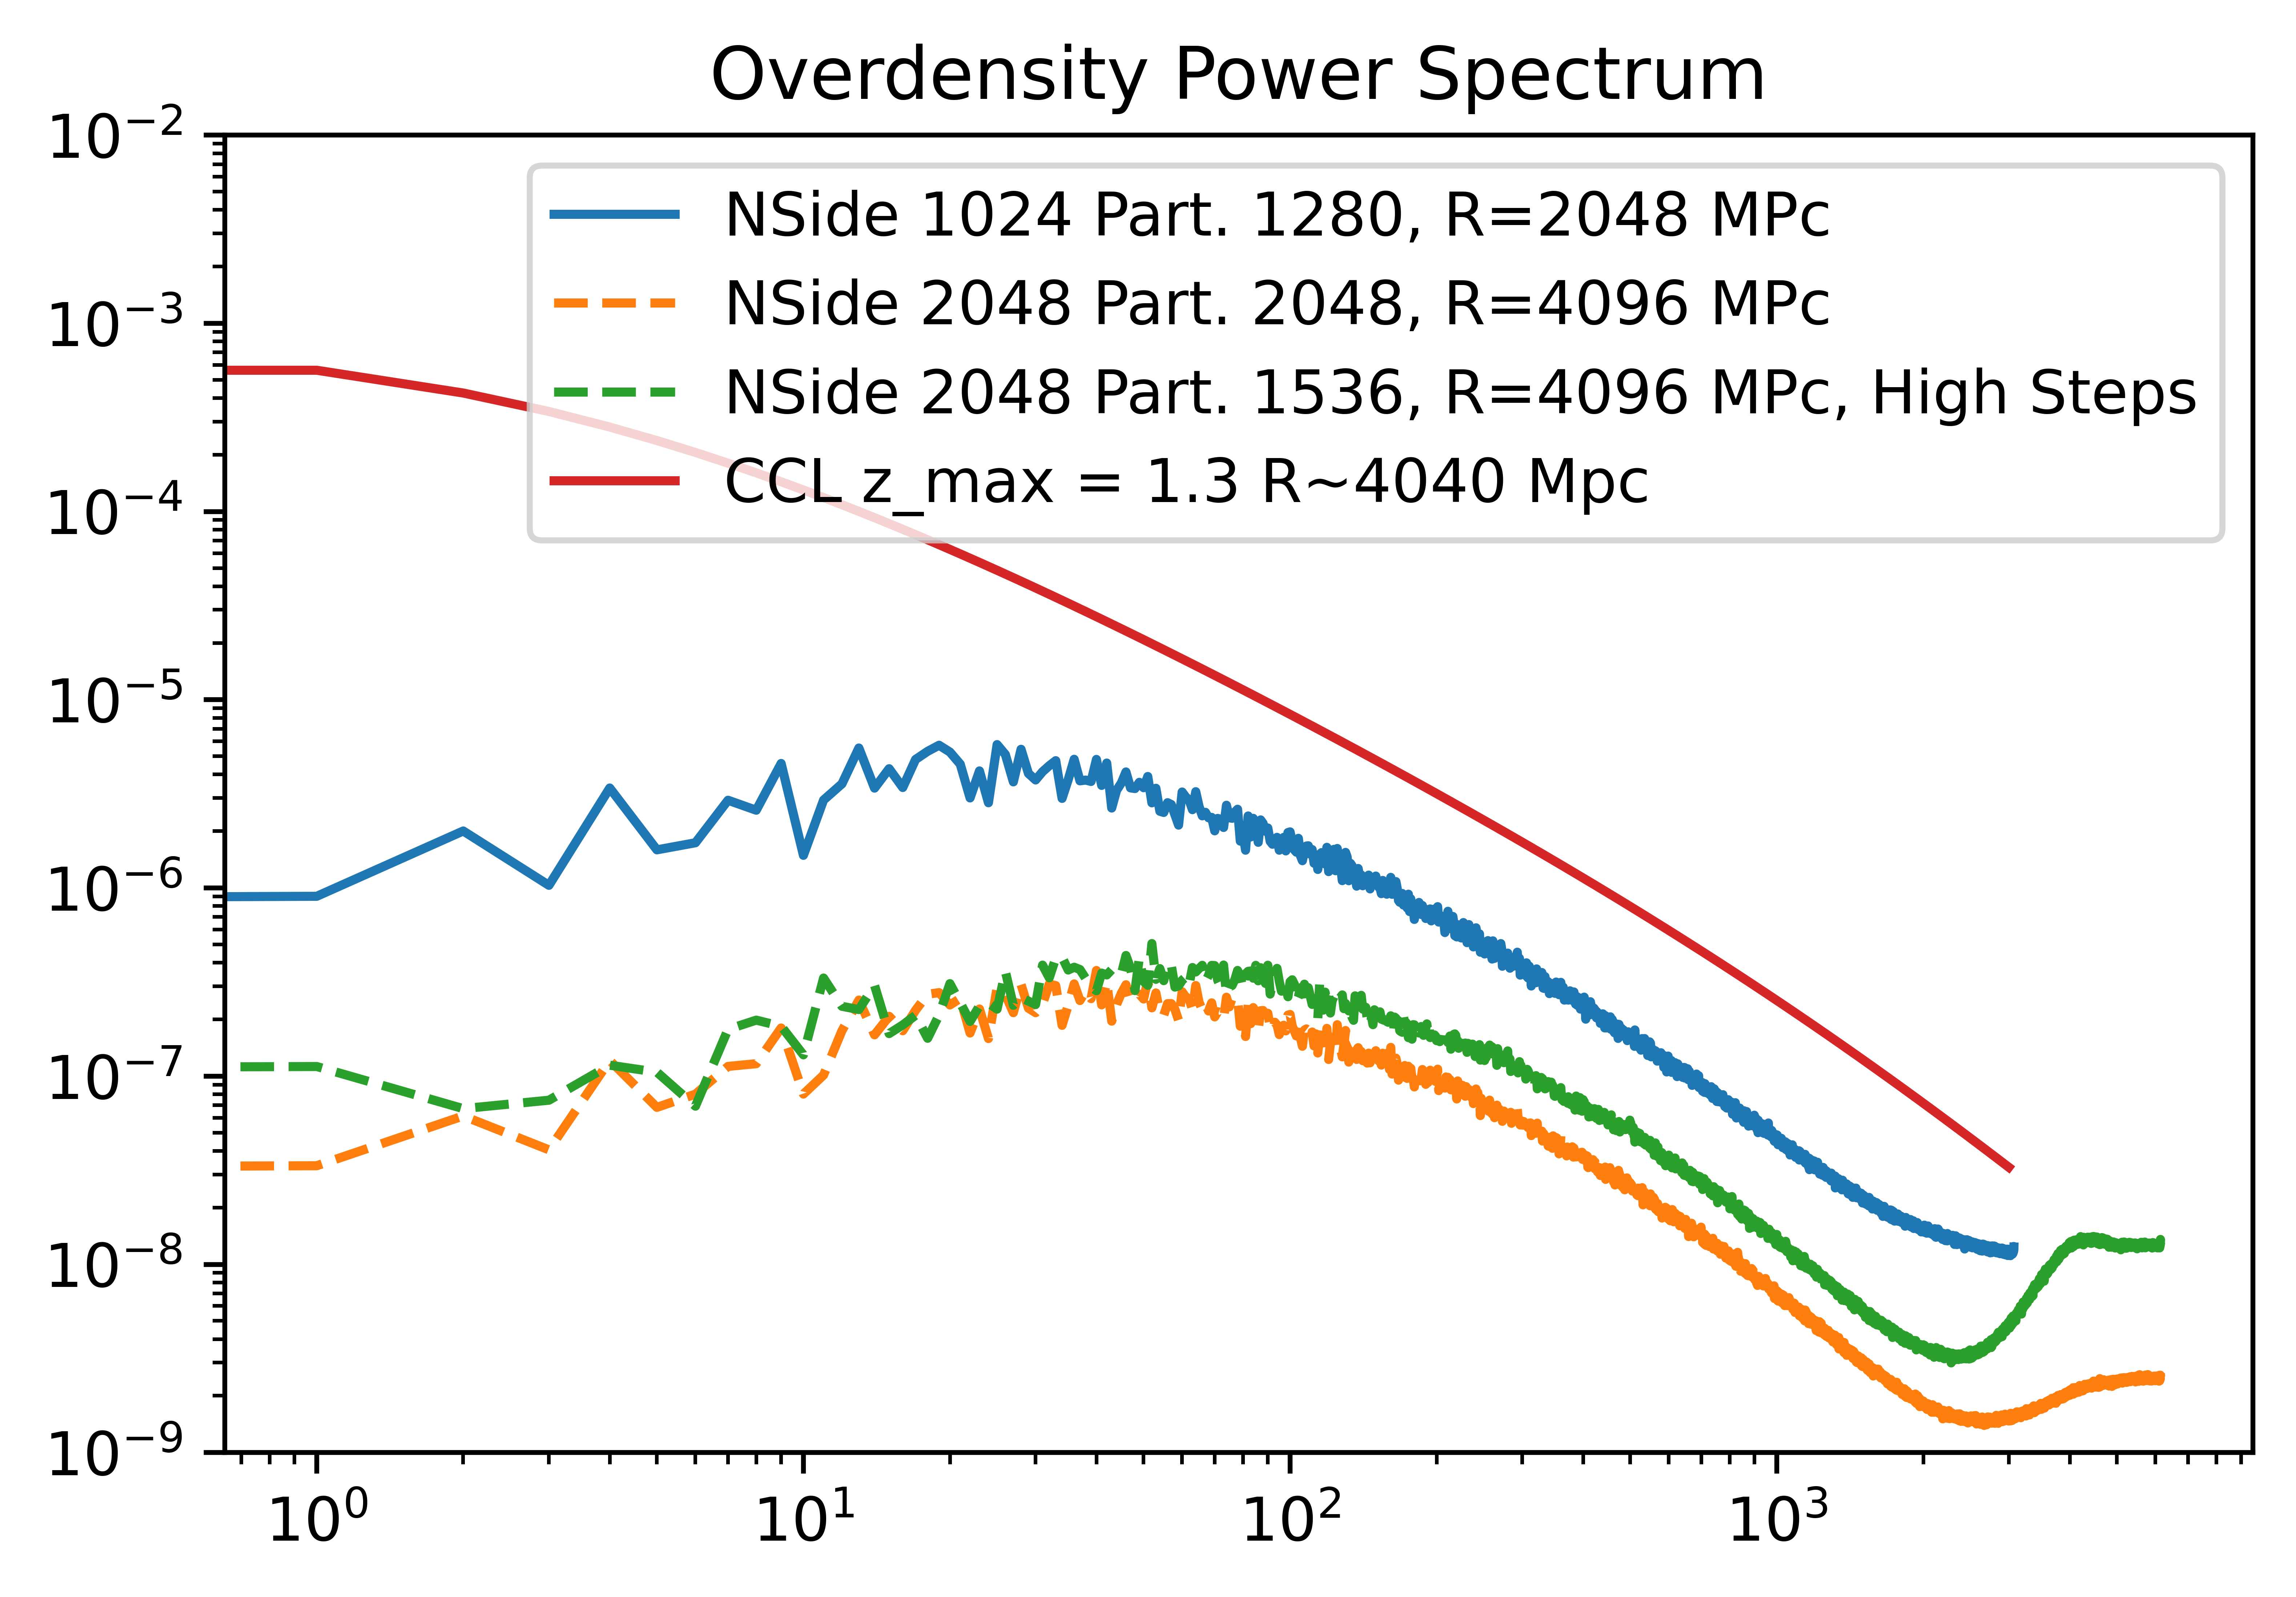

In [33]:
plt.figure(dpi=1200)
plt.loglog(psOver128);
plt.loglog(psOver256,"--");
plt.loglog(psOverS5,"--");
plt.loglog(cls_clu);
plt.legend(loc=0, labels=["NSide 1024 Part. 1280, R=2048 MPc","NSide 2048 Part. 2048, R=4096 MPc","NSide 2048 Part. 1536, R=4096 MPc, High Steps", "CCL z_max = 1.3 R~4040 Mpc"])
plt.title("Overdensity Power Spectrum")
plt.ylim(10**-9,10**-2)
plt.show()

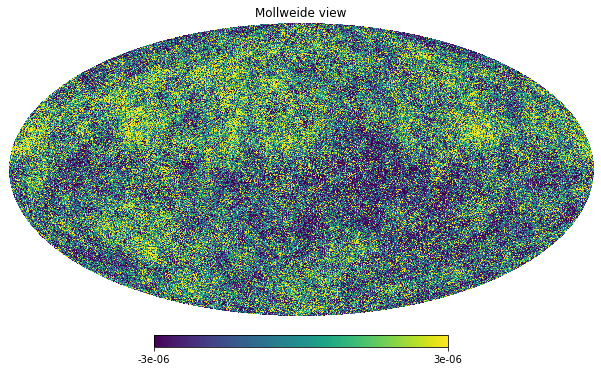

In [6]:
kSZ256 = hp.read_map("MAPS/kSZ_NS_2048_R_4096_P_2048_DV_256.fits")
kSZS5 = hp.read_map("MAPS/kSZ_NS_2048_R_4096_P_1536_DV_256.fits")
hp.mollview(kSZ256,xsize=6400, min=-3*10**-6,max=3*10**-6)

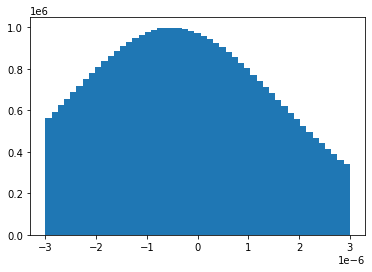

In [7]:
plt.hist(kSZ256,bins = np.linspace(-3*10**-6,3*10**-6));

In [8]:
pskSZ256 = hp.sphtfunc.anafast(kSZ256)
pskSZS5 = hp.sphtfunc.anafast(kSZS5)

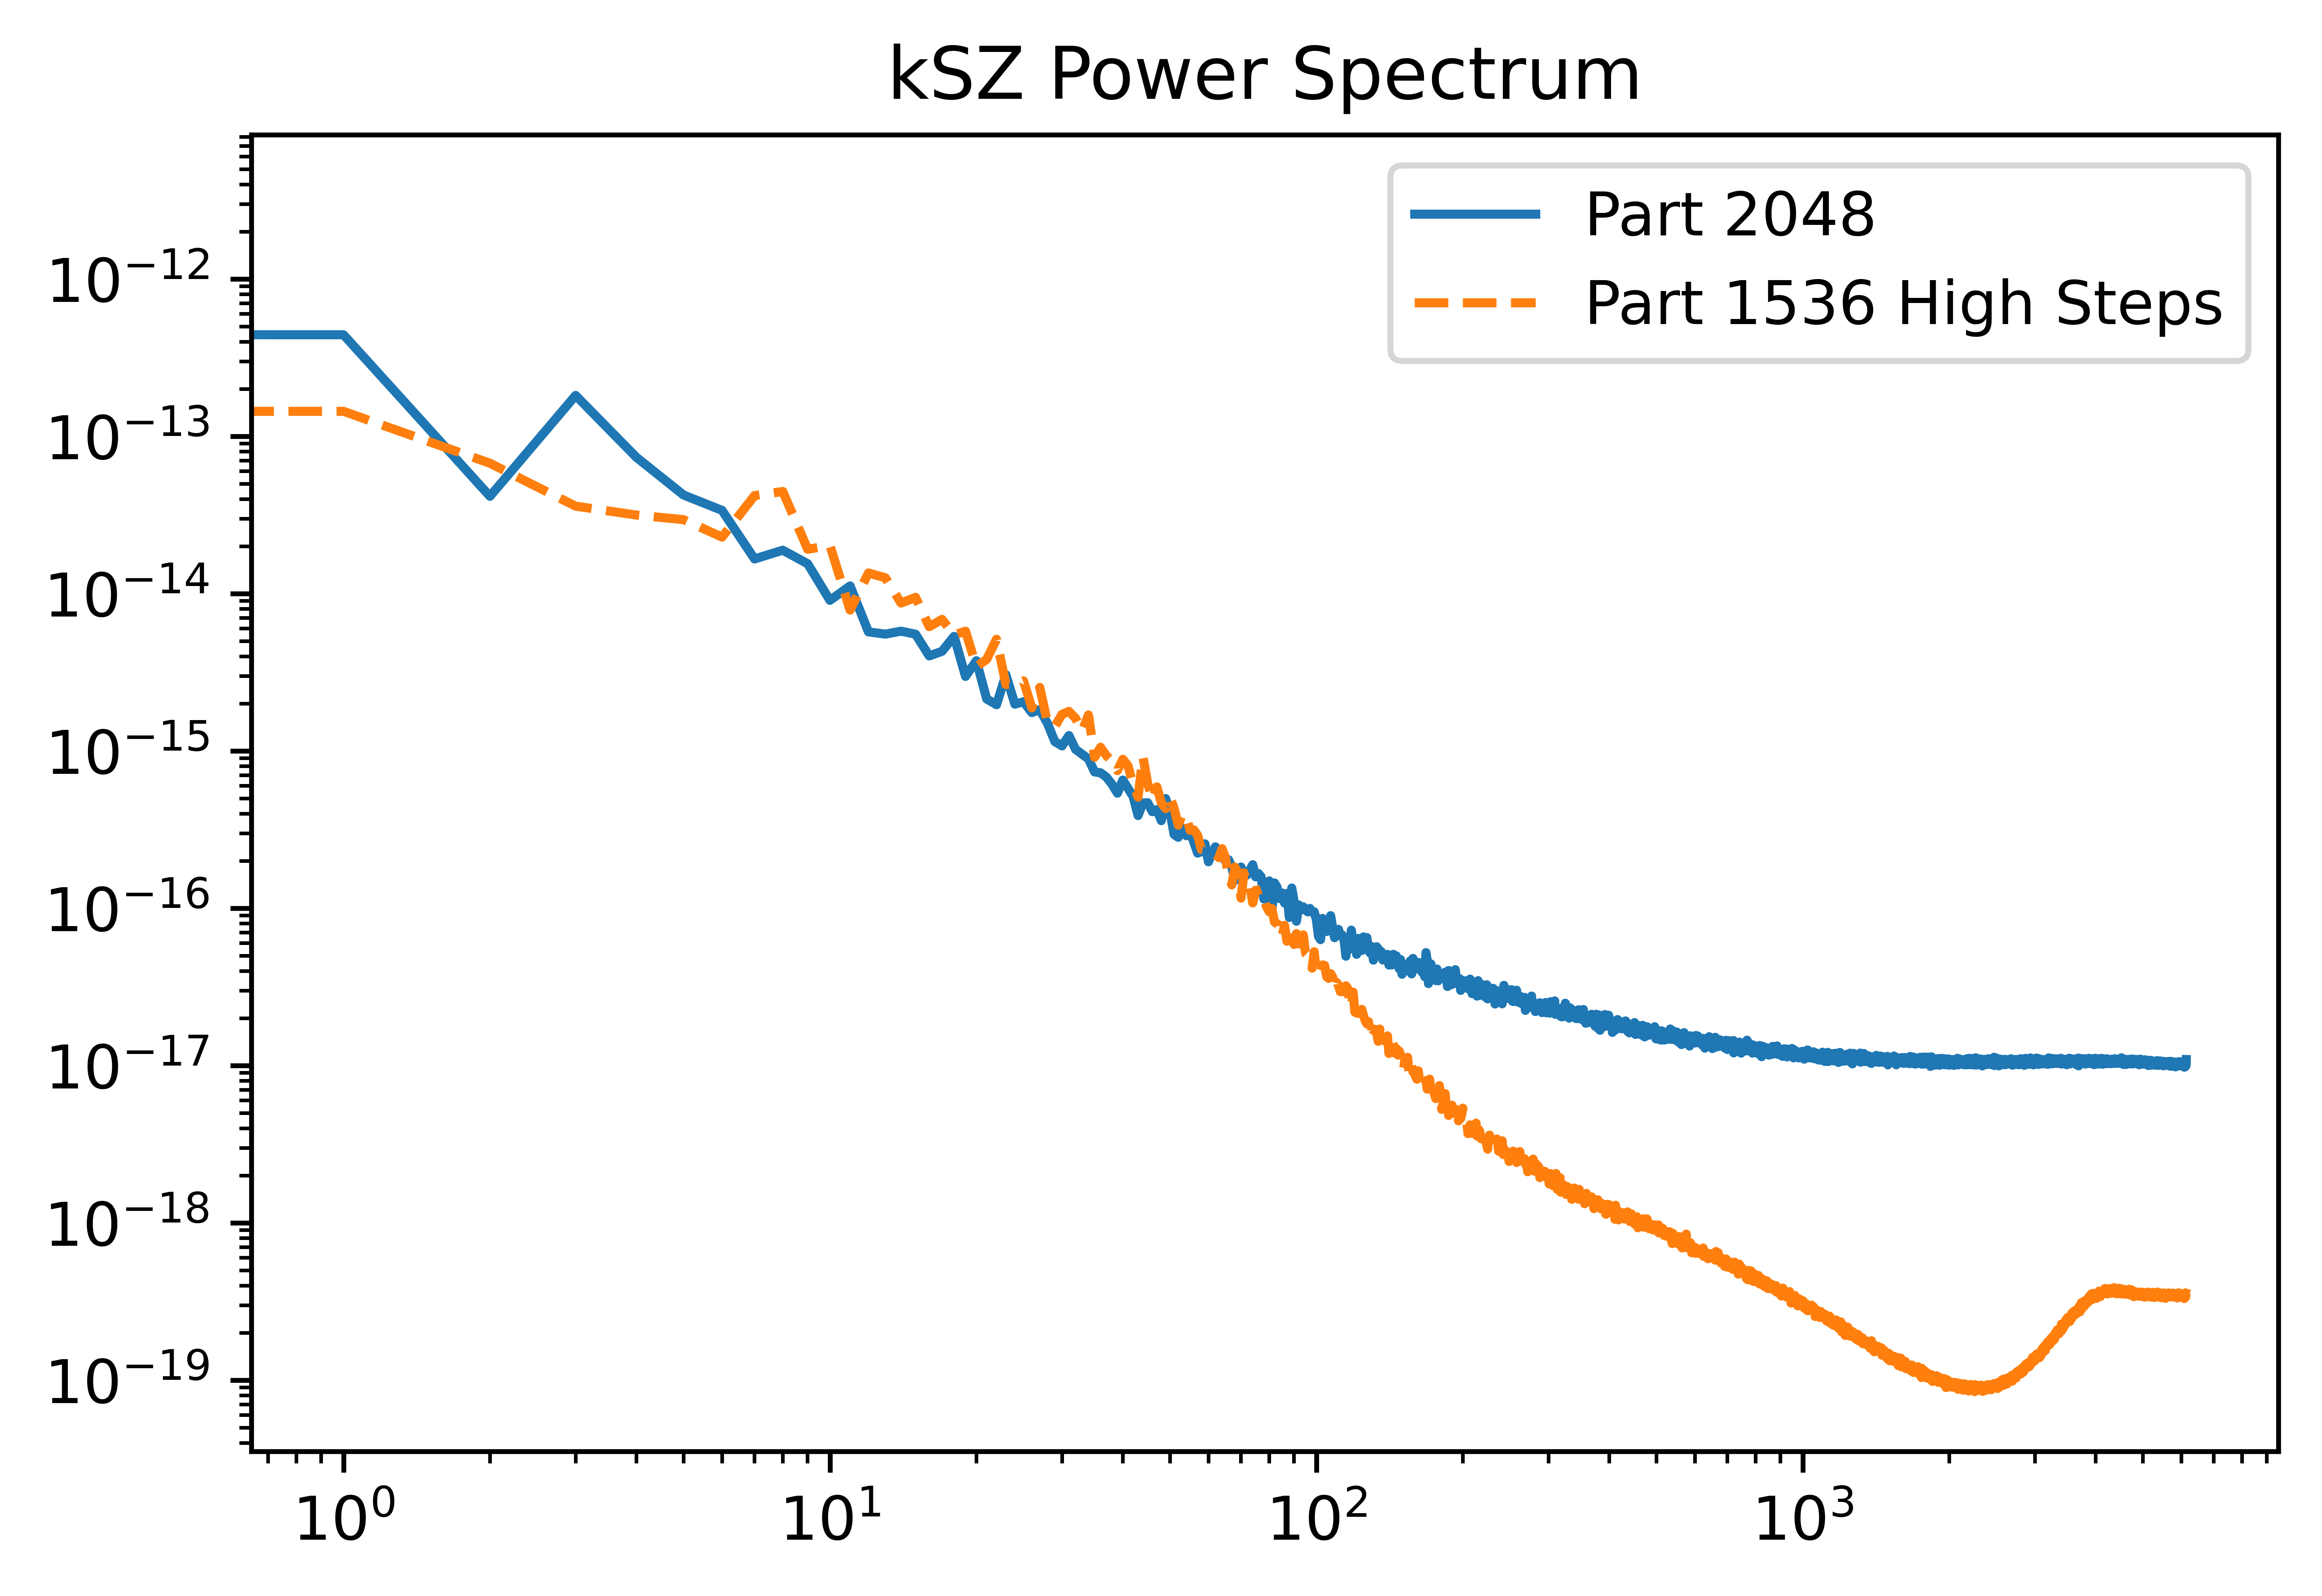

In [9]:
plt.figure(dpi=1200)
plt.loglog(pskSZ256);
plt.loglog(pskSZS5,"--");
plt.legend(loc=0, labels=["Part 2048","Part 1536 High Steps"])
plt.title("kSZ Power Spectrum")
plt.show()

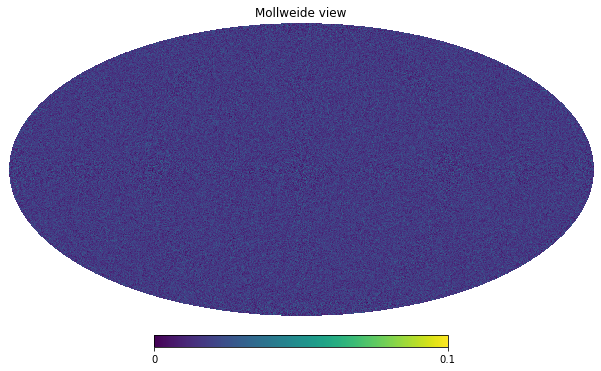

In [10]:
convergenceDV256 = hp.read_map("MAPS/convergence_NS_2048_R_4096_P_2048_DV_256.fits")
convergenceDVS5 = hp.read_map("MAPS/convergence_NS_2048_R_4096_P_1536_DV_256.fits")
hp.mollview(convergenceDVS5,xsize=3200, max=.1)

In [11]:
psKDV256 = hp.sphtfunc.anafast(convergenceDV256)
psKDVS5 = hp.sphtfunc.anafast(convergenceDVS5)

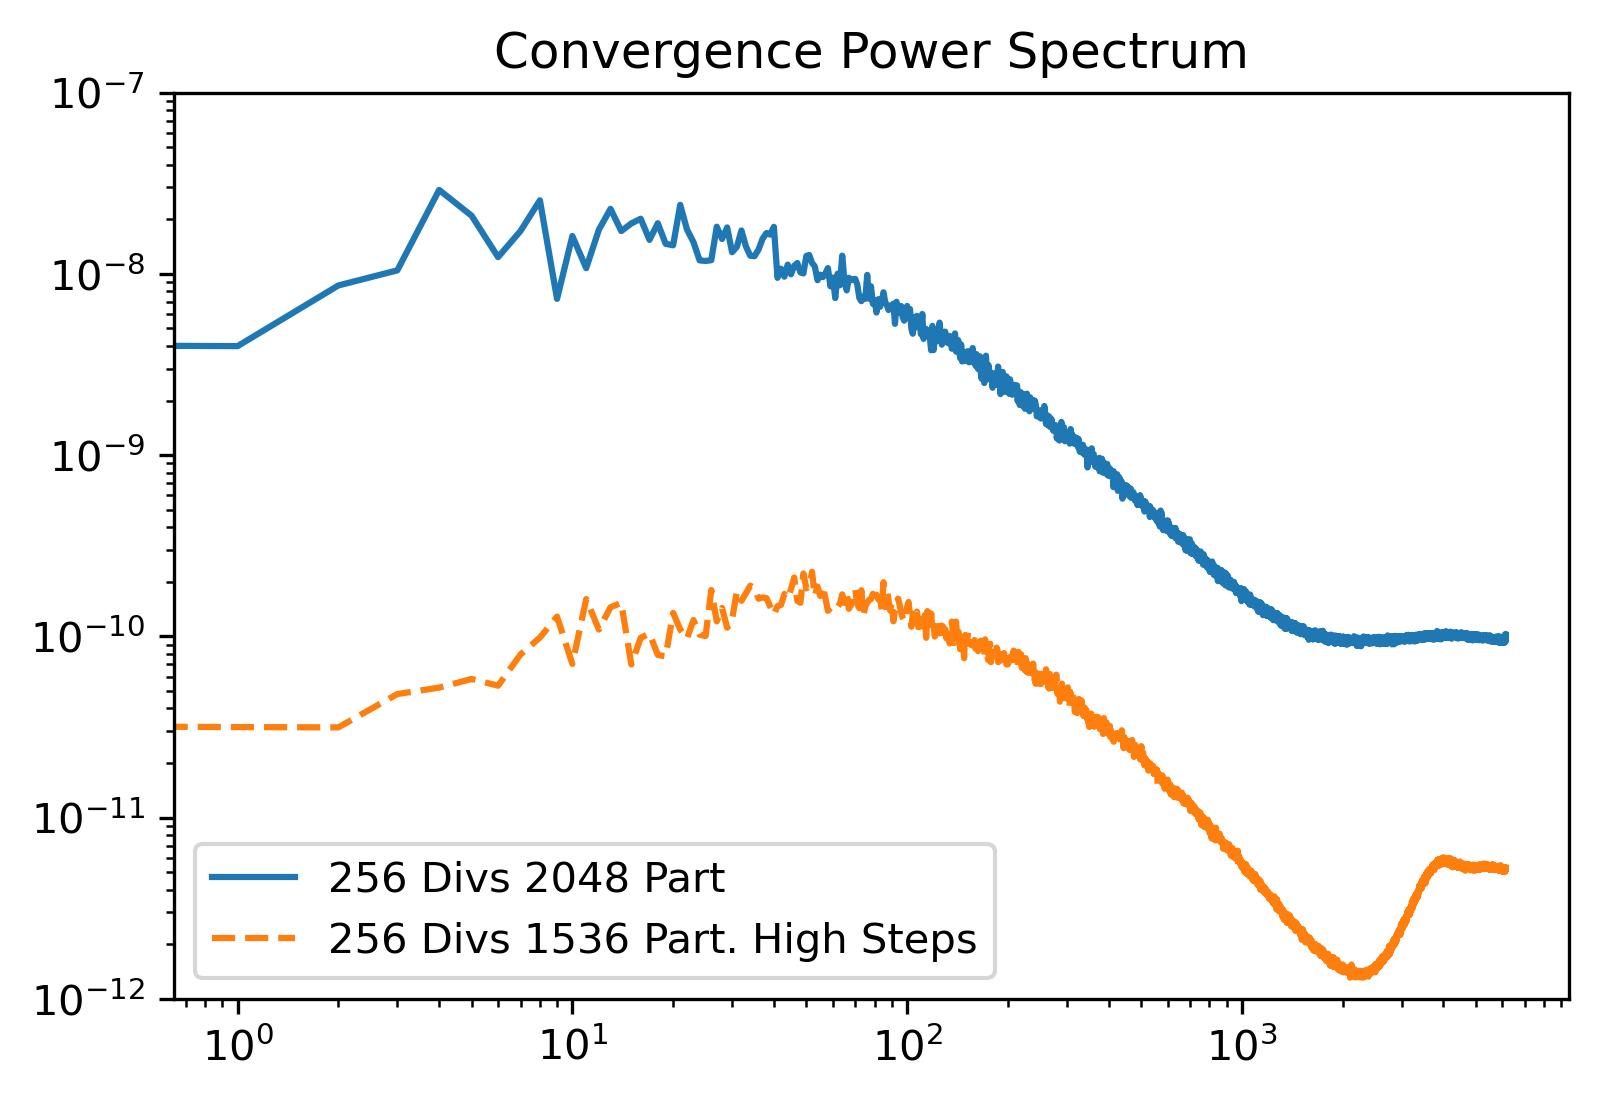

In [12]:
plt.figure(dpi=300)
plt.loglog(psKDV256);
plt.loglog(psKDVS5,"--");
plt.legend(loc=0, labels=["256 Divs 2048 Part","256 Divs 1536 Part. High Steps"])
plt.title("Convergence Power Spectrum")
plt.ylim(10**-12,10**-7)
plt.show()

# CCL

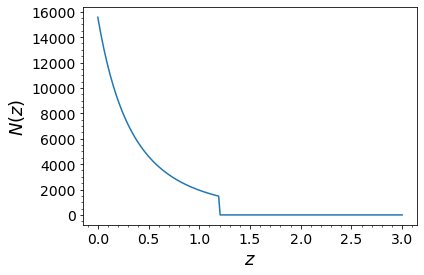

In [13]:
import pyccl as ccl

cosmo = ccl.Cosmology(Omega_c = 0.27, Omega_b = 0.045, h = 0.67, sigma8 = 0.83, n_s = 0.96)

z = np.linspace(0., 3., 200)
i_lim = 26. # Limiting i-band magnitude
z0 = 0.0417*i_lim - 0.744

#Ngal = 46. * 100.31 * (i_lim - 25.) # Normalisation, galaxies/arcmin^2
#pz = 1./(2.*z0) * (z / z0)**2. * np.exp(-z/z0) # Redshift distribution, p(z)
#dNdz = Ngal * pz # Number density distribution
dNdz = np.zeros(z.shape)
dNdz[0:80] = 3000
dNdz = dNdz*(5.189)/(1+z)**3
b = 1*np.ones(200) #Galaxy bias (constant with scale and z)

plt.xlabel('$z$',fontsize=18)
plt.ylabel('$N(z)$',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(z, dNdz)
plt.minorticks_on()
plt.show()

In [14]:
lens1 = ccl.WeakLensingTracer(cosmo, dndz=(z, dNdz)) #CCL automatically normalizes dNdz
clu1 = ccl.NumberCountsTracer(cosmo, has_rsd=False, dndz=(z,dNdz), bias=(z,b))

In [15]:
bias_ia = 1*np.ones_like(z) #A_IA=1 in the NLA model
lens1_ia = ccl.WeakLensingTracer(cosmo, dndz = (z,dNdz), ia_bias = (z,bias_ia))

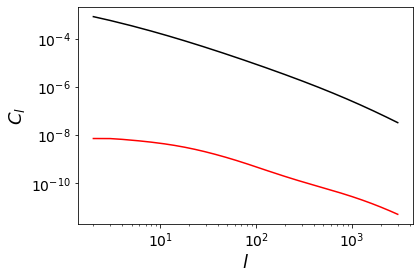

In [16]:
ell = np.arange(2, 3000)

cls = ccl.angular_cl(cosmo, lens1, lens1, ell) #Cosmic shear
cls_ia = ccl.angular_cl(cosmo, lens1_ia, lens1_ia, ell) #Cosmic shear with IA
cls_clu = ccl.angular_cl(cosmo, clu1, clu1, ell) #Clustering

plt.xlabel('$l$',fontsize=18)
plt.ylabel('$C_l$',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.xscale('log')
plt.plot(ell, cls_clu, 'k-')
plt.plot(ell, cls_ia, 'r-')
plt.show()

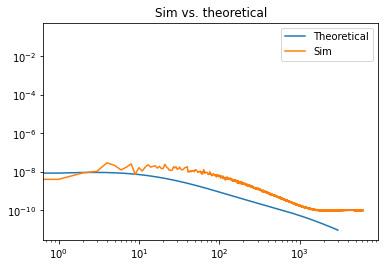

In [17]:
plt.loglog(cls);
plt.loglog(psKDV256);
plt.title("Sim vs. theoretical");
plt.legend(["Theoretical","Sim"]);

# Lensed kSZ

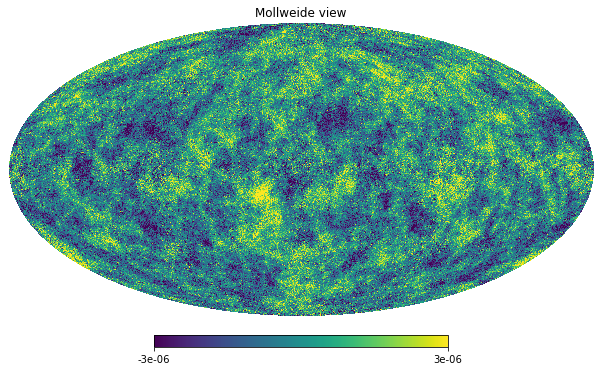

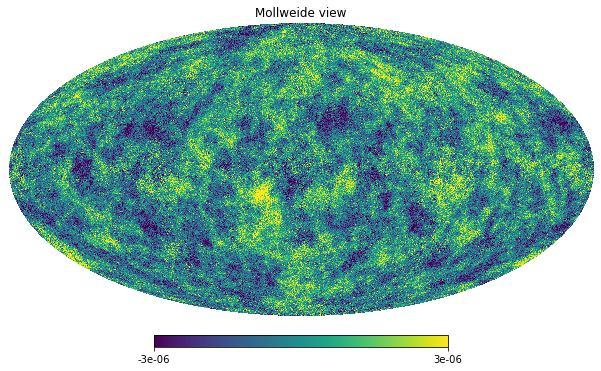

In [18]:
kSZLens = hp.read_map("MAPS/lensedkSZ_NS_2048_R_4096_P_2048_DV_256.fits")
kSZUnLens = hp.read_map("MAPS/kSZ_NS_2048_R_4096_P_2048_DV_256.fits")
kSZLens1024 = hp.read_map("MAPS/lensedkSZ_NS_1024_R_2048_P_1280_DV_128.fits")
kSZUnLens1024 = hp.read_map("MAPS/kSZ_NS_1024_R_2048_P_1280_DV_128.fits")
kSZLensS5 = hp.read_map("MAPS/lensedkSZ_NS_2048_R_4096_P_1536_DV_256.fits")
kSZUnLensS5 = hp.read_map("MAPS/kSZ_NS_2048_R_4096_P_1536_DV_256.fits")
hp.mollview(kSZLensS5,xsize=6400, min=-3*10**-6,max=3*10**-6)
hp.mollview(kSZUnLensS5,xsize=6400, min=-3*10**-6,max=3*10**-6)

In [19]:
psLens = hp.sphtfunc.anafast(kSZLens)
psUnLens = hp.sphtfunc.anafast(kSZUnLens)
psLens1024 = hp.sphtfunc.anafast(kSZLens1024)
psUnLens1024 = hp.sphtfunc.anafast(kSZUnLens1024)
psLensS5 = hp.sphtfunc.anafast(kSZLensS5)
psUnLensS5 = hp.sphtfunc.anafast(kSZUnLensS5)

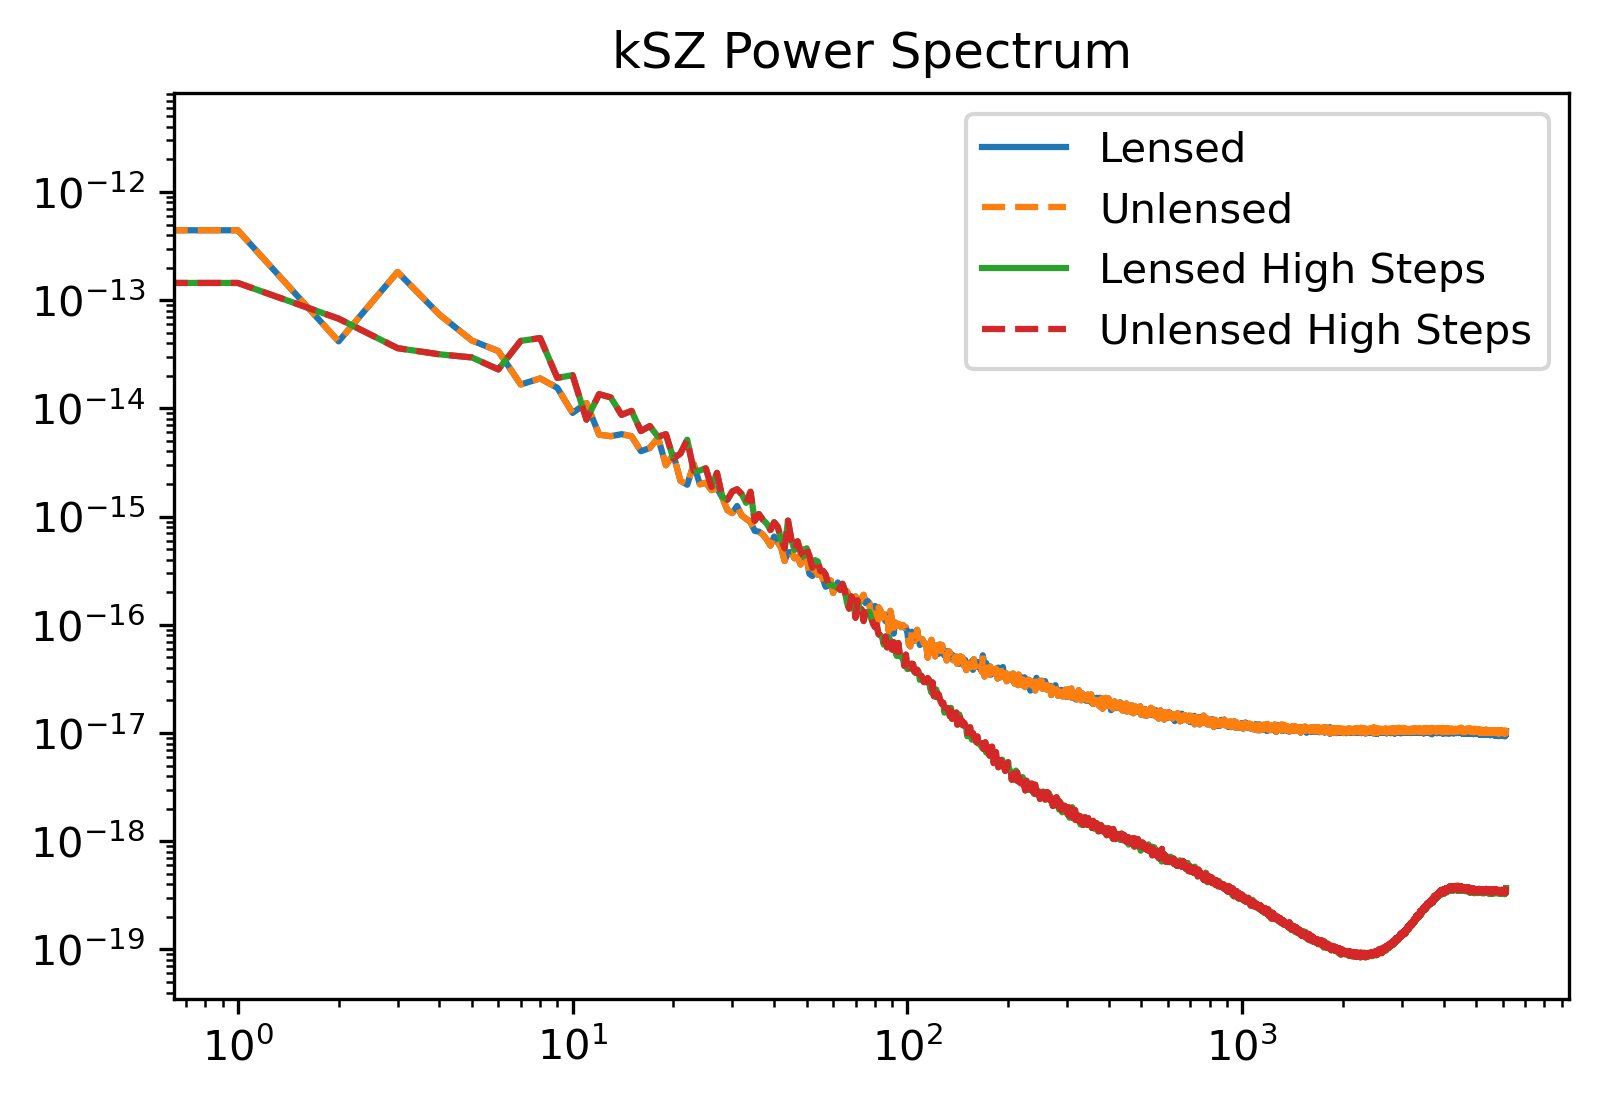

In [20]:
lFactor=np.arange(len(psLens))*(np.arange(len(psLens))+1)
plt.figure(dpi=300)
plt.loglog(psLens);
plt.loglog(psUnLens,"--");
plt.loglog(psLensS5);
plt.loglog(psUnLensS5,"--");
plt.legend(loc=0, labels=["Lensed","Unlensed","Lensed High Steps","Unlensed High Steps"])
plt.title("kSZ Power Spectrum")
plt.show()

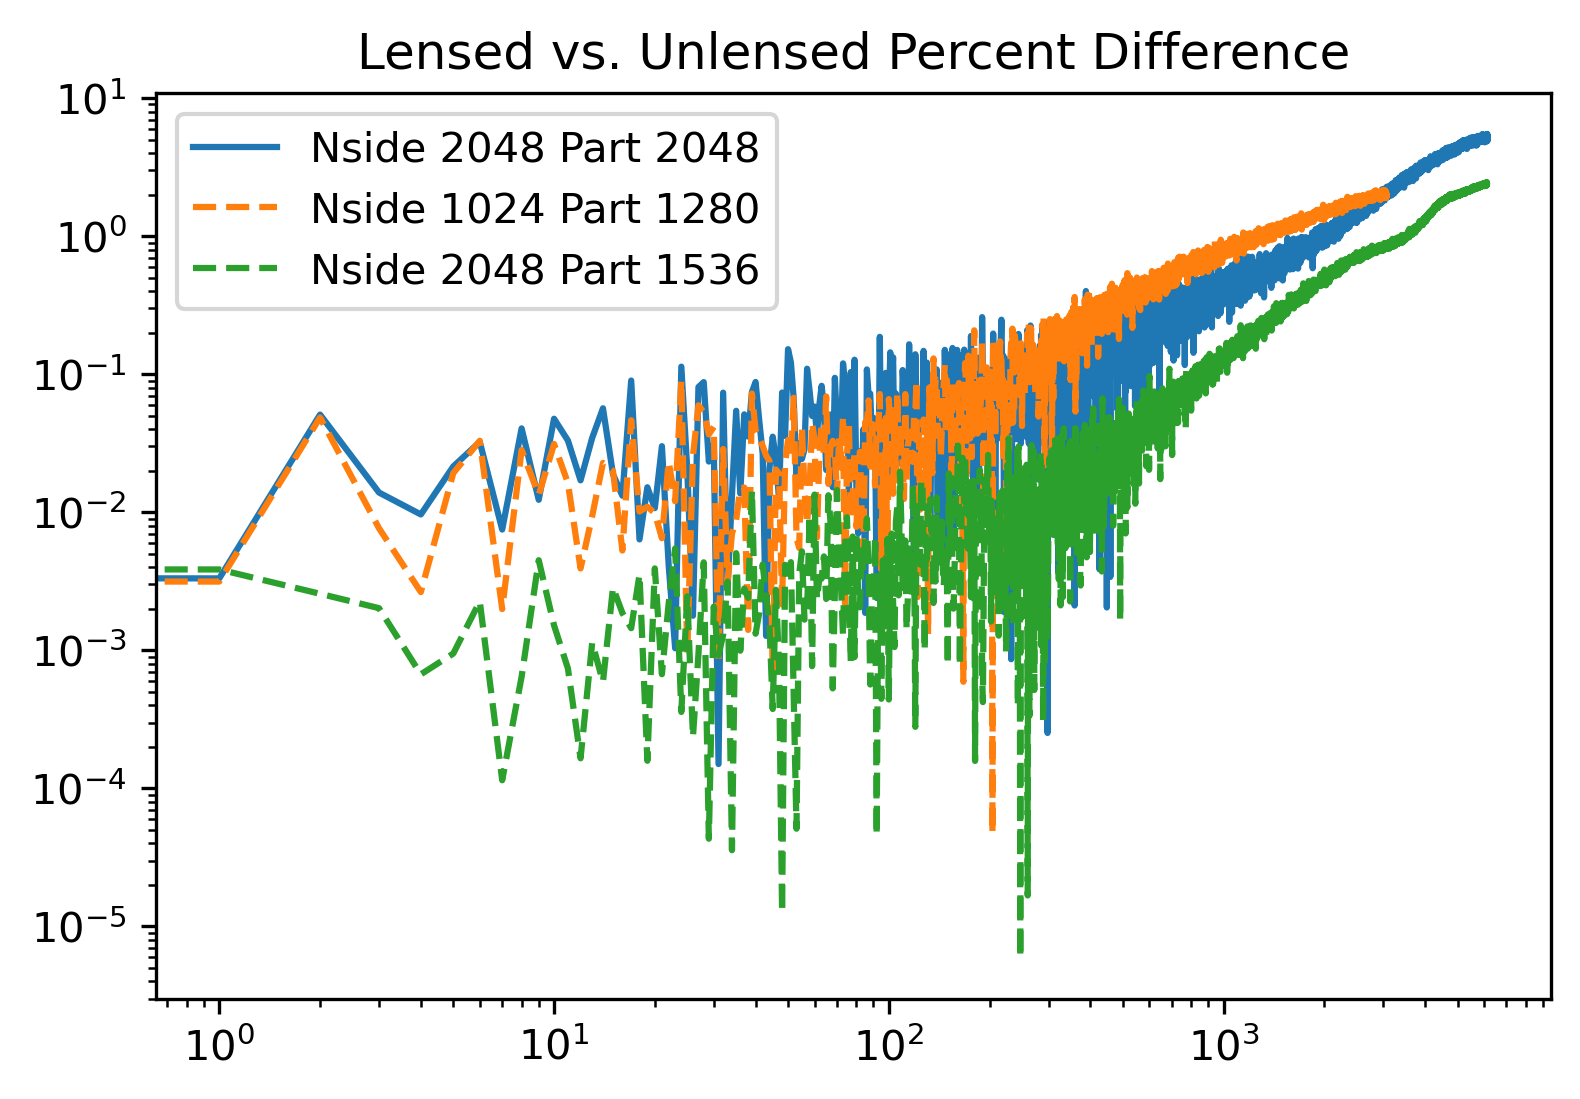

In [21]:
plt.figure(dpi=300)
plt.loglog(np.abs((psLens-psUnLens)/psLens)*100);
plt.loglog(np.abs((psLens1024-psUnLens1024)/psLens1024)*100,"--");
plt.loglog(np.abs((psLensS5-psUnLensS5)/psLensS5)*100,"--");
plt.legend(loc=0, labels=["Nside 2048 Part 2048", "Nside 1024 Part 1280","Nside 2048 Part 1536"])
plt.title("Lensed vs. Unlensed Percent Difference")
plt.show()

In [22]:
densCrossLens = hp.anafast(overdensity256,kSZLens)
densCrossUnLens = hp.anafast(overdensity256,kSZUnLens)
densCrossLensS5 = hp.anafast(overdensityS5,kSZLensS5)
densCrossUnLensS5 = hp.anafast(overdensityS5,kSZUnLensS5)

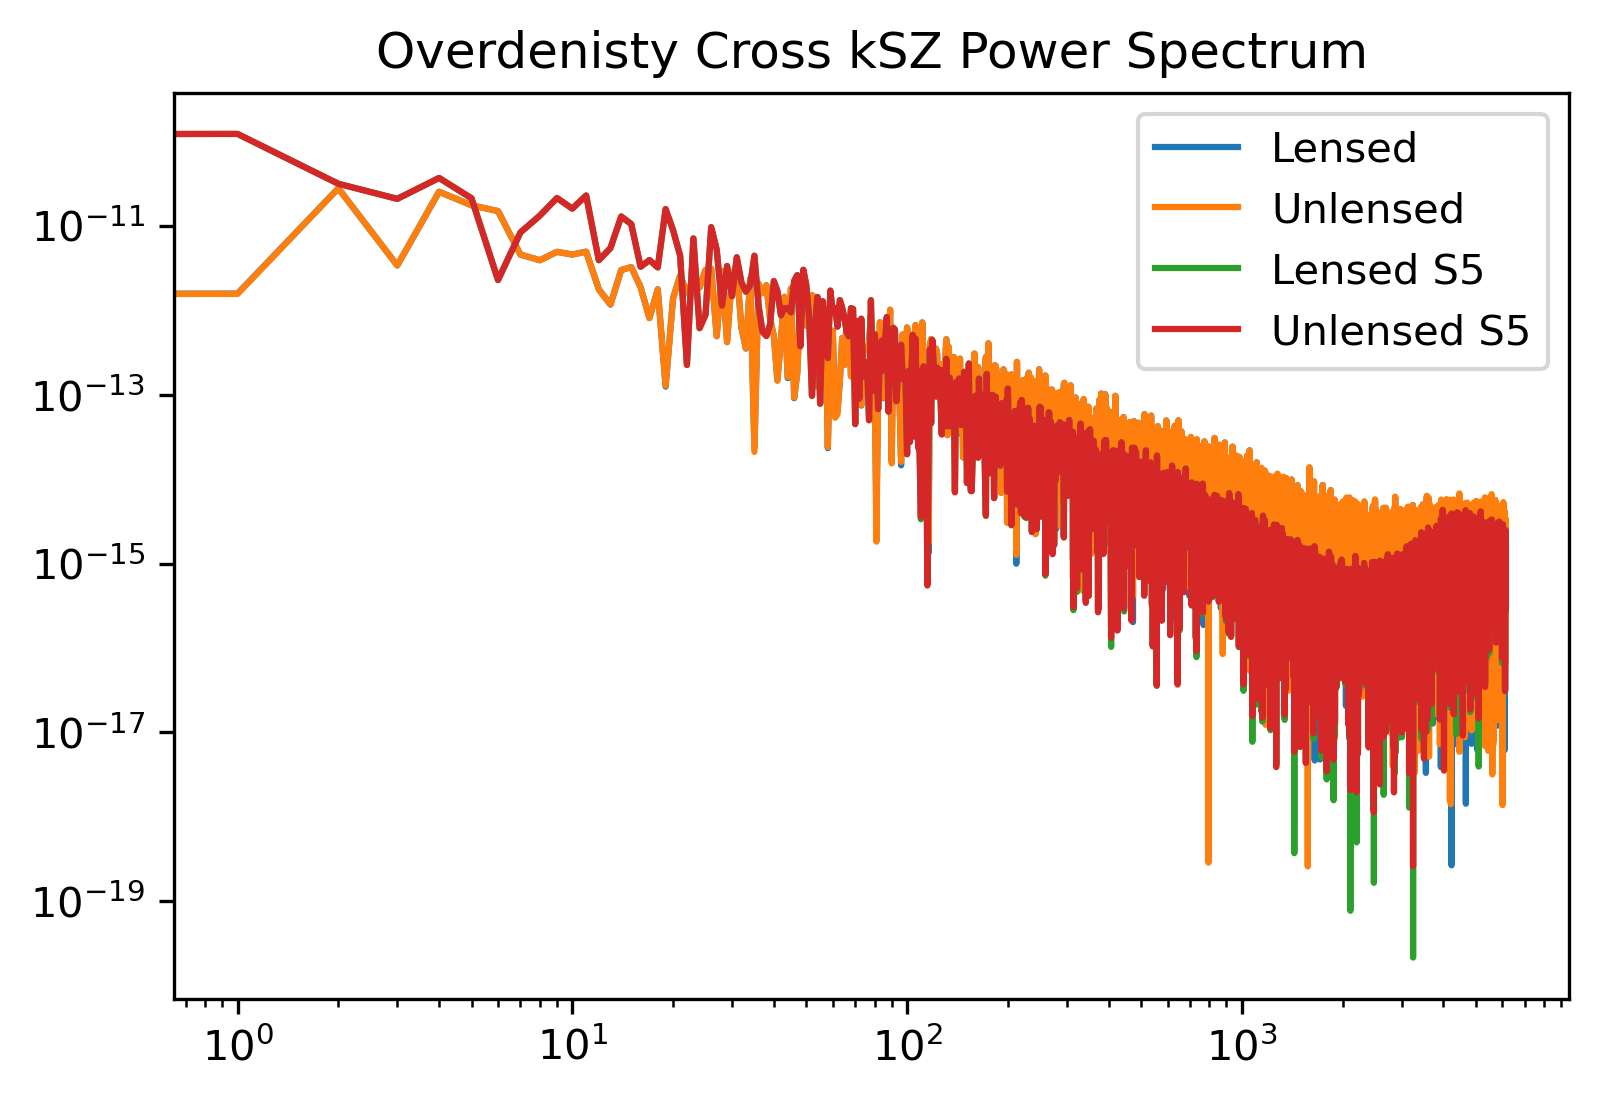

In [23]:
plt.figure(dpi=300)
plt.loglog(np.abs(densCrossLens),markersize=1);
plt.loglog(np.abs(densCrossUnLens),markersize=1);
plt.loglog(np.abs(densCrossLensS5),markersize=1);
plt.loglog(np.abs(densCrossUnLensS5),markersize=1);
plt.legend(loc=0, labels=["Lensed","Unlensed","Lensed S5","Unlensed S5"])
plt.title("Overdenisty Cross kSZ Power Spectrum")
plt.show()

In [24]:
#TODO use andrina's edges things
edges = np.linspace(0,6300,num=100).astype(np.int64)
densCrossLensBin = [0]*(len(edges)-1)
densCrossUnLensBin = [0]*(len(edges)-1)
densCrossLensS5Bin = [0]*(len(edges)-1)
densCrossUnLensS5Bin = [0]*(len(edges)-1)

for i in range(len(edges)-1):
    densCrossLensBin[i] = np.mean(densCrossLens[edges[i]:edges[i+1]])
    densCrossUnLensBin[i] = np.mean(densCrossUnLens[edges[i]:edges[i+1]])
    densCrossLensS5Bin[i] = np.mean(densCrossLensS5[edges[i]:edges[i+1]])
    densCrossUnLensS5Bin[i] = np.mean(densCrossUnLensS5[edges[i]:edges[i+1]])

/home/wurdahl/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/wurdahl/.local/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


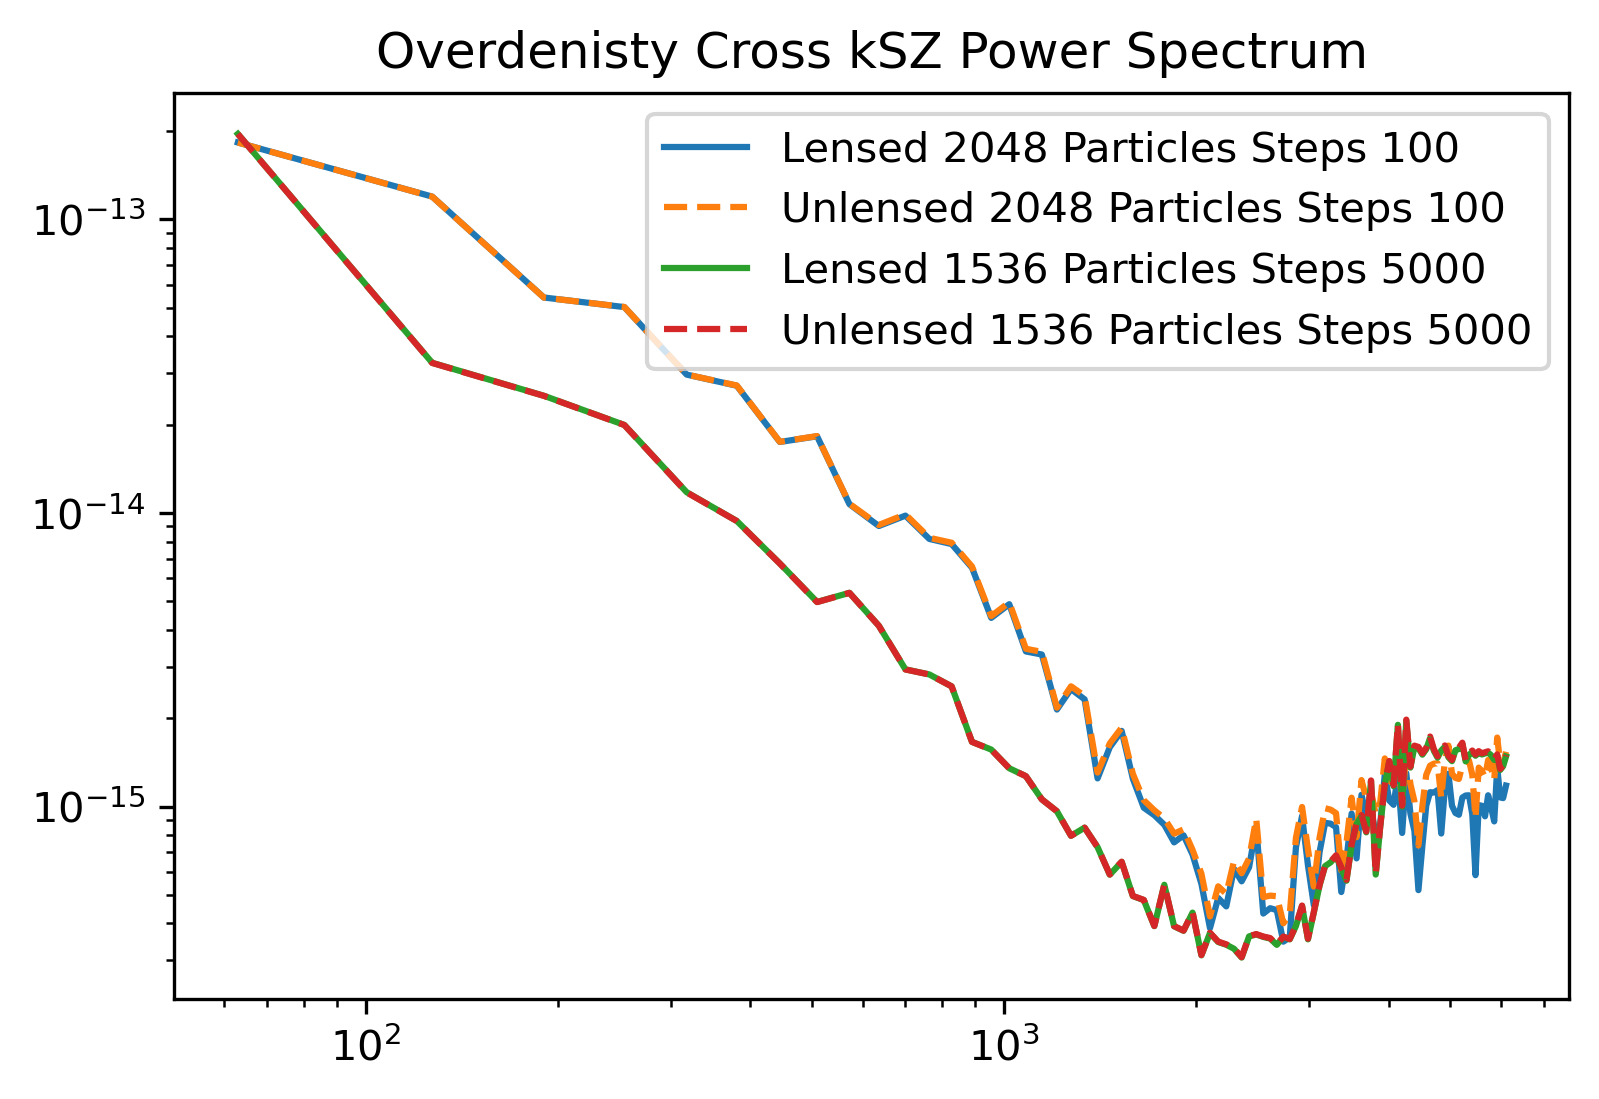

In [25]:
plt.figure(dpi=300)
plt.loglog(edges[1:-1],np.abs(densCrossLensBin[1:]),markersize=1);
plt.loglog(edges[1:-1],np.abs(densCrossUnLensBin[1:]),"--",markersize=1);
plt.loglog(edges[1:-1],np.abs(densCrossLensS5Bin[1:]),markersize=1);
plt.loglog(edges[1:-1],np.abs(densCrossUnLensS5Bin[1:]),"--",markersize=1);
plt.legend(loc=0, labels=["Lensed 2048 Particles Steps 100","Unlensed 2048 Particles Steps 100","Lensed 1536 Particles Steps 5000","Unlensed 1536 Particles Steps 5000"])
plt.title("Overdenisty Cross kSZ Power Spectrum")
plt.show()

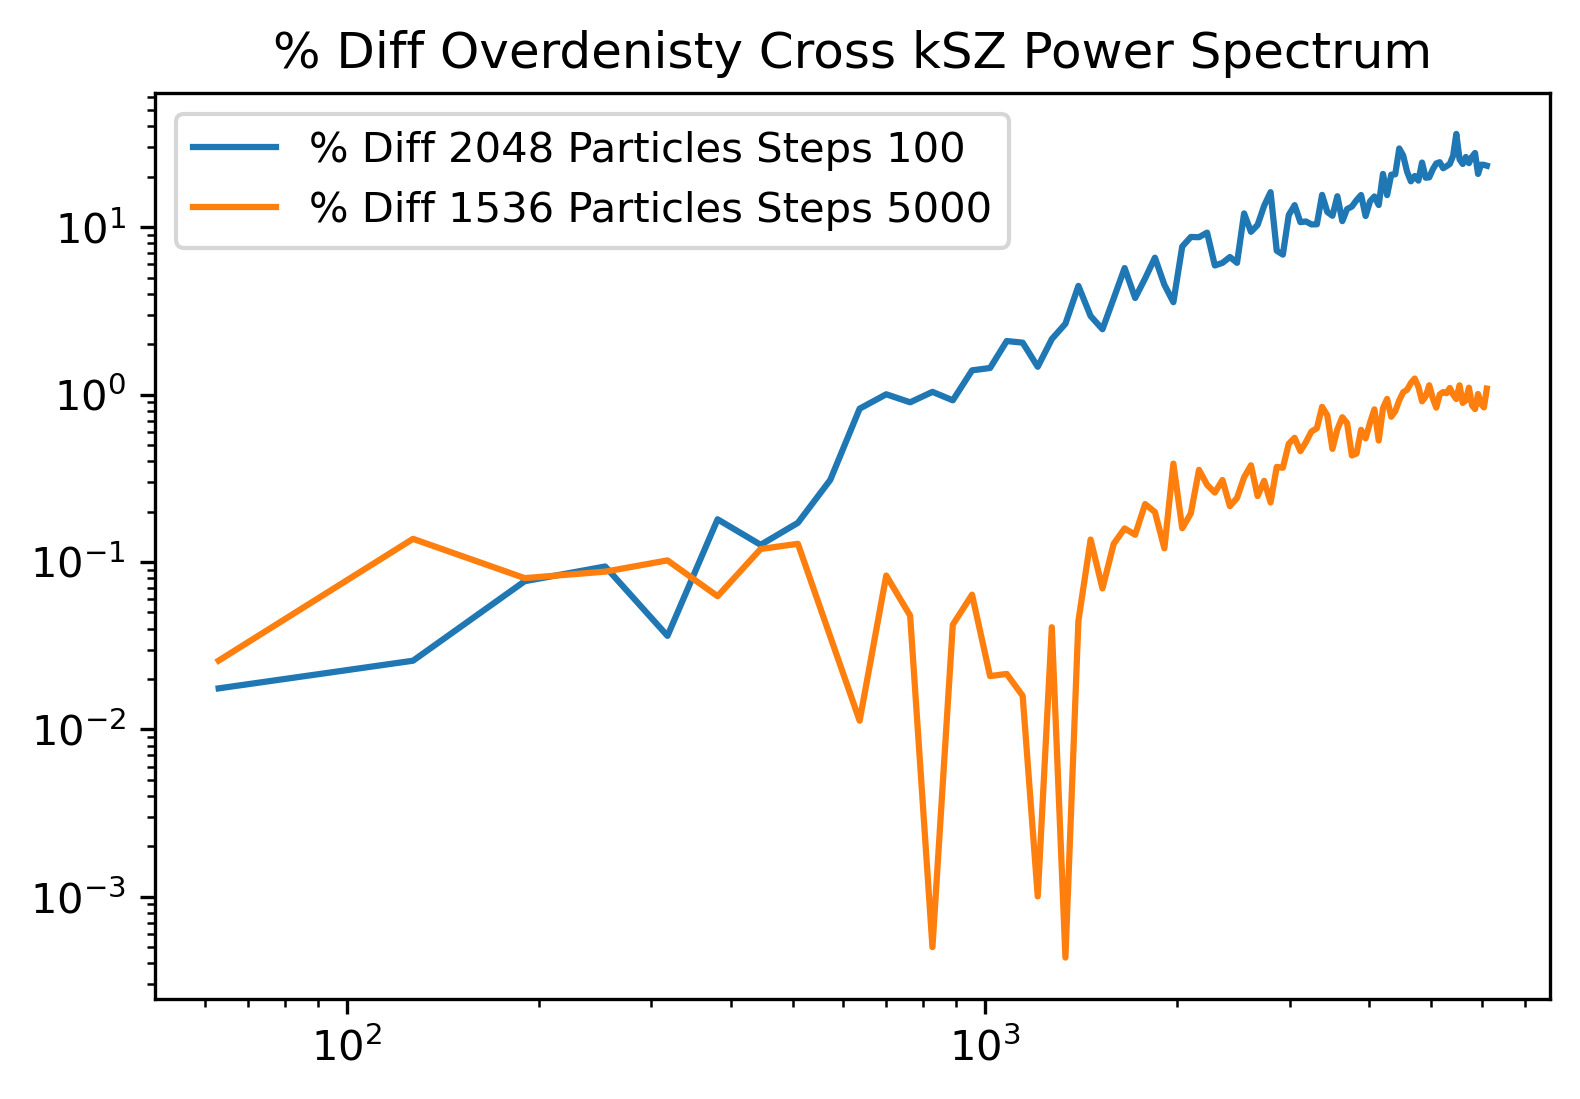

In [26]:
plt.figure(dpi=300)
plt.loglog(edges[1:-1],100*np.abs((np.subtract(densCrossLensBin[1:],densCrossUnLensBin[1:]))/densCrossUnLensBin[1:]),markersize=1);
plt.loglog(edges[1:-1],100*np.abs((np.subtract(densCrossLensS5Bin[1:],densCrossUnLensS5Bin[1:]))/densCrossUnLensS5Bin[1:]),markersize=1);
plt.legend(loc=0, labels=["% Diff 2048 Particles Steps 100","% Diff 1536 Particles Steps 5000"])
plt.title("% Diff Overdenisty Cross kSZ Power Spectrum")
plt.show()

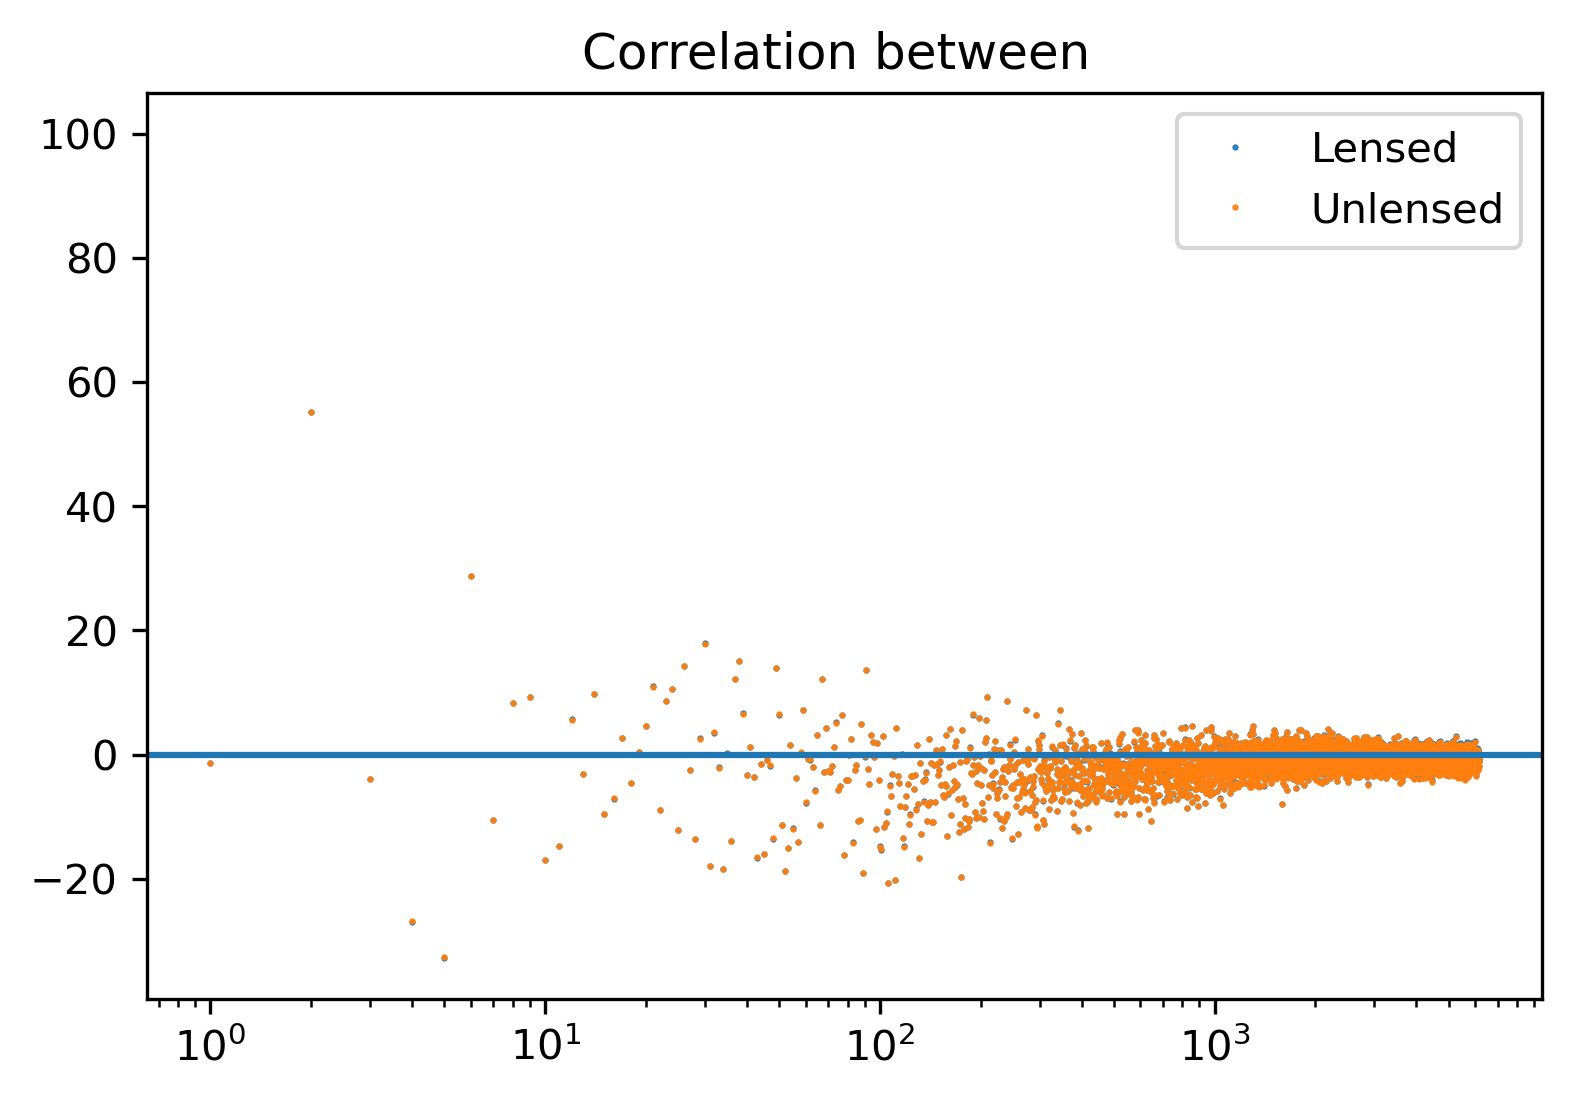

In [27]:
correlationLens = densCrossLens/np.sqrt(psOver256*psLens)
correlationUnLens = densCrossUnLens/np.sqrt(psOver256*psUnLens)
plt.figure(dpi=300)
plt.plot(correlationLens*100,".",markersize=1);
plt.plot(correlationUnLens*100,".",markersize=1);
plt.legend(loc=0, labels=["Lensed","Unlensed"])
plt.title("Correlation between ")
plt.semilogx()
plt.axhline(0)
plt.show()

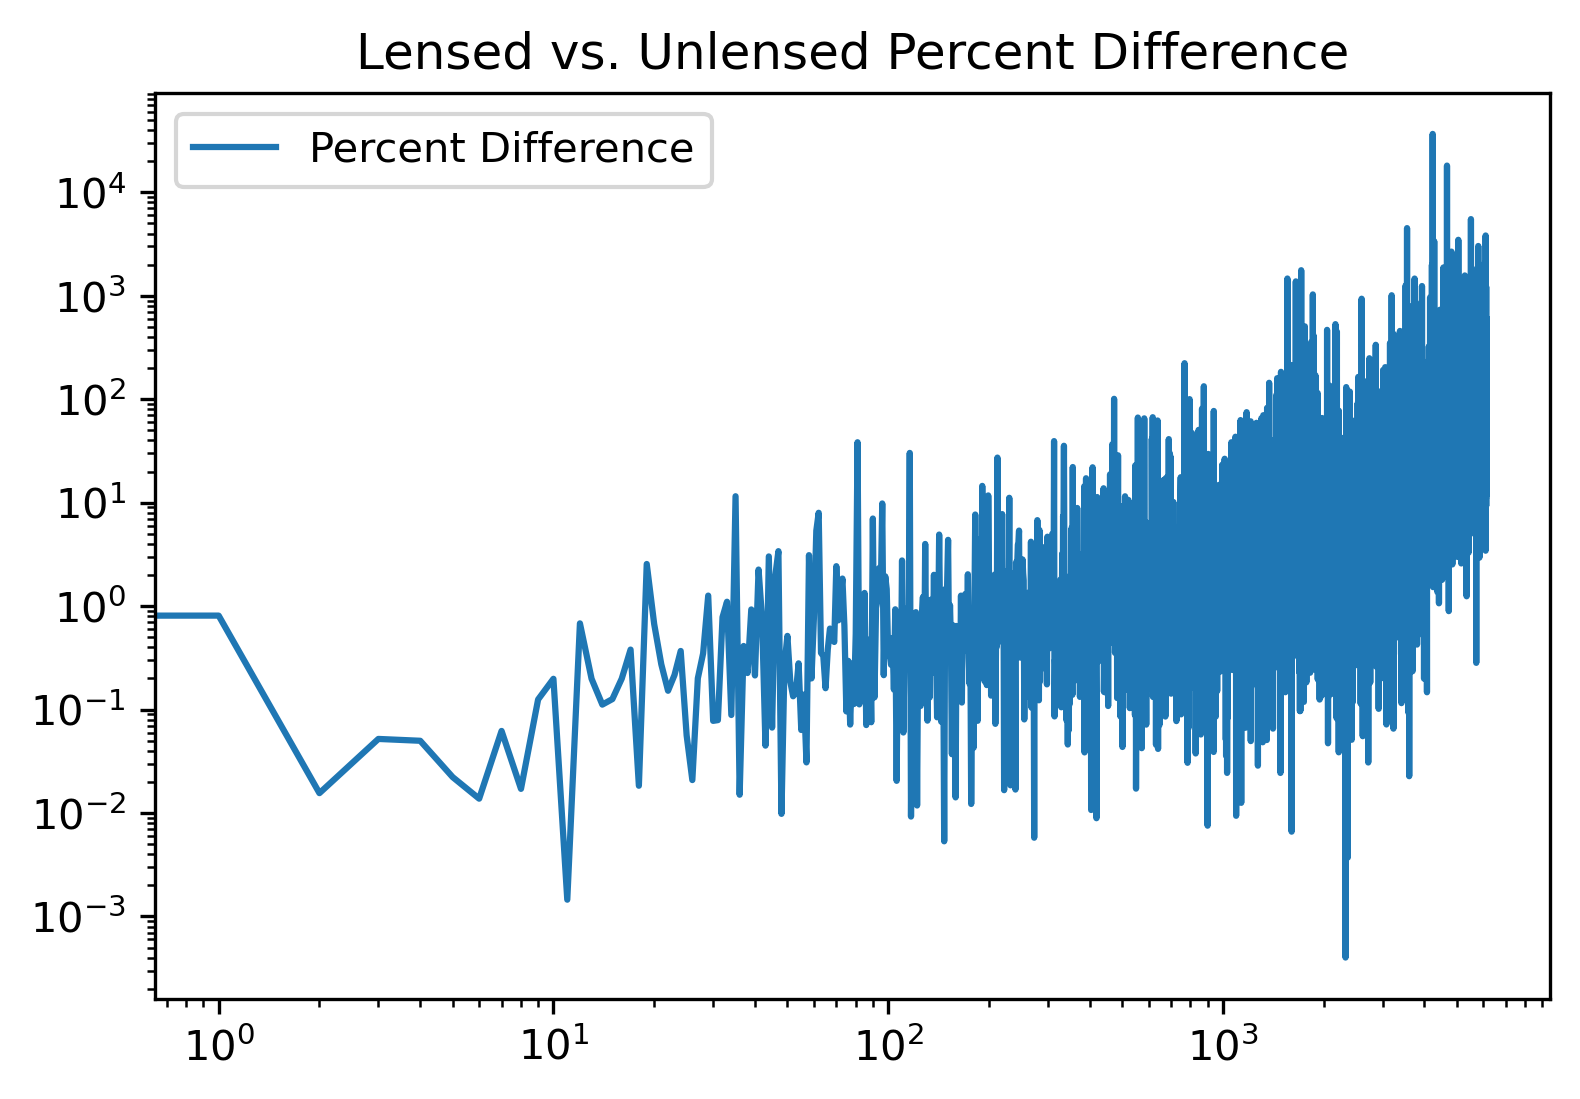

In [28]:
plt.figure(dpi=300)
plt.loglog(np.abs((densCrossLens-densCrossUnLens)/densCrossLens)*100);
plt.legend(loc=0, labels=["Percent Difference"])
plt.title("Lensed vs. Unlensed Percent Difference")
plt.show()

## Convergence Cross kSZ

In [29]:
kCrosskSZLensed = hp.anafast(convergenceDV256,kSZLens)
kCrosskSZUnLensed = hp.anafast(convergenceDV256,kSZUnLens)

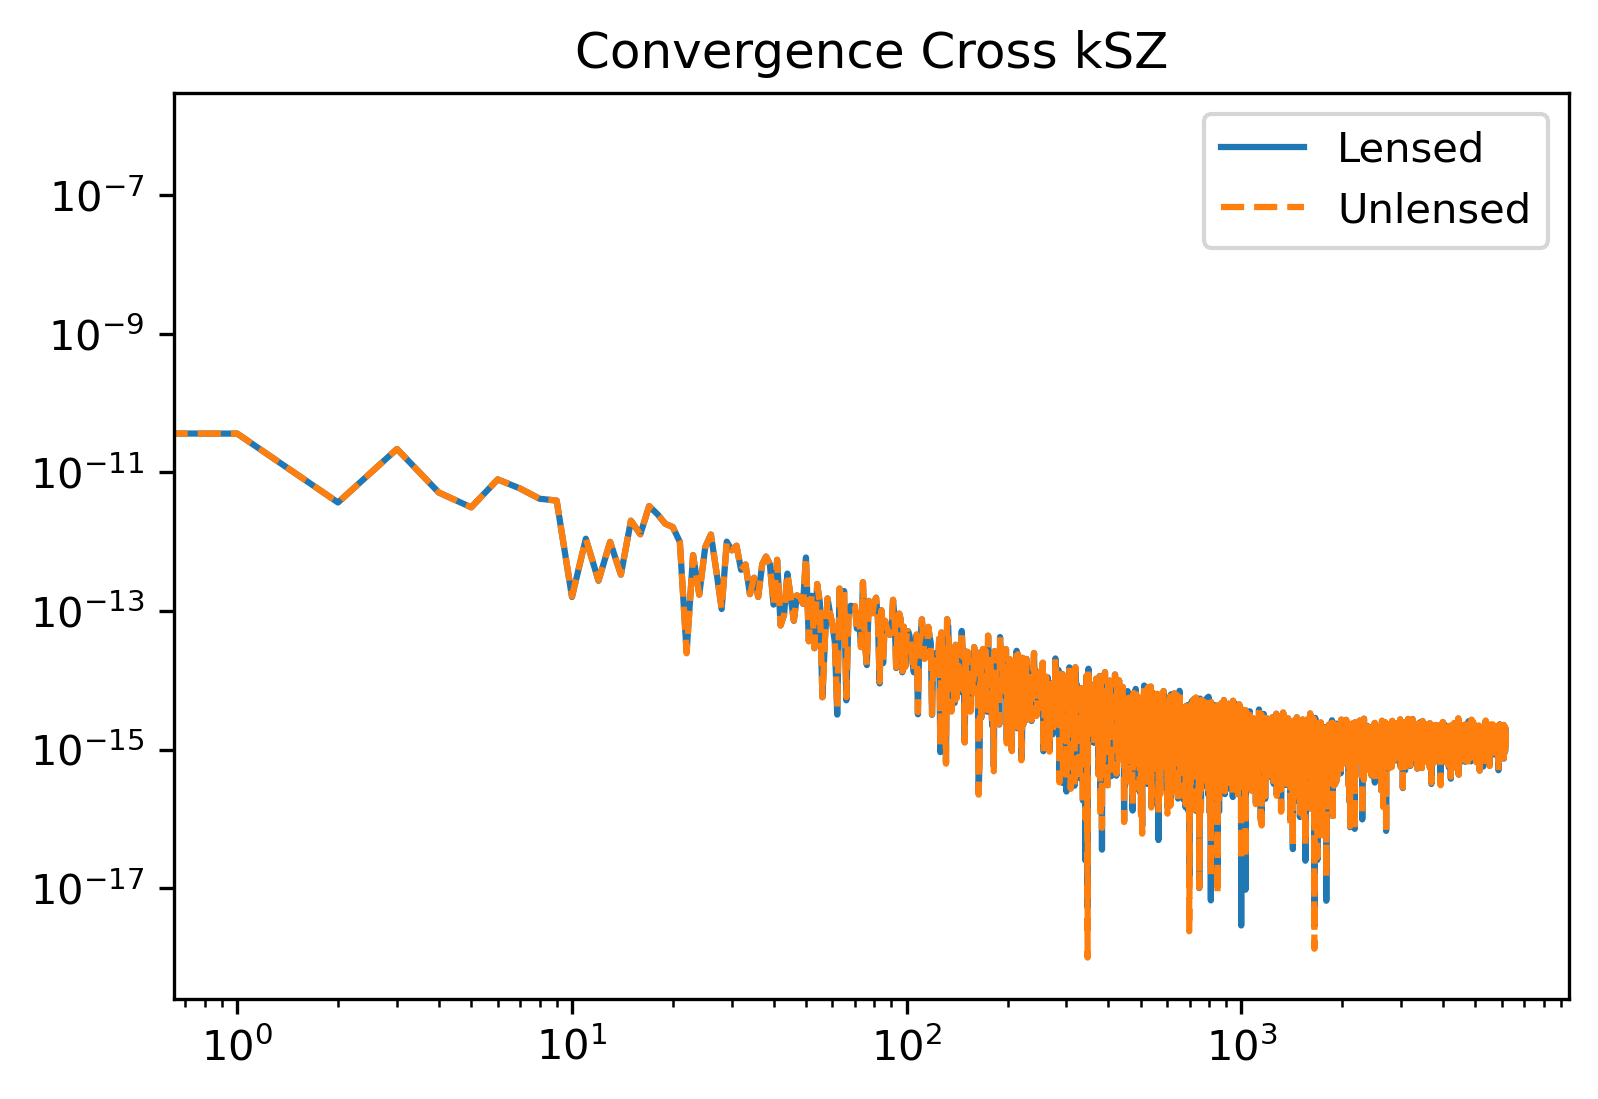

In [30]:
plt.figure(dpi=300)
plt.loglog(np.abs(kCrosskSZLensed),markersize=1);
plt.loglog(np.abs(kCrosskSZUnLensed),"--",markersize=1);
plt.legend(loc=0, labels=["Lensed","Unlensed"])
plt.title("Convergence Cross kSZ")
plt.show()

In [31]:
correlationLenskxkSZ = kCrosskSZLensed/np.sqrt(hp.anafast(convergenceDV256)*psLens)
correlationUnLenskxkSZ = kCrosskSZUnLensed/np.sqrt(hp.anafast(convergenceDV256)*psUnLens)

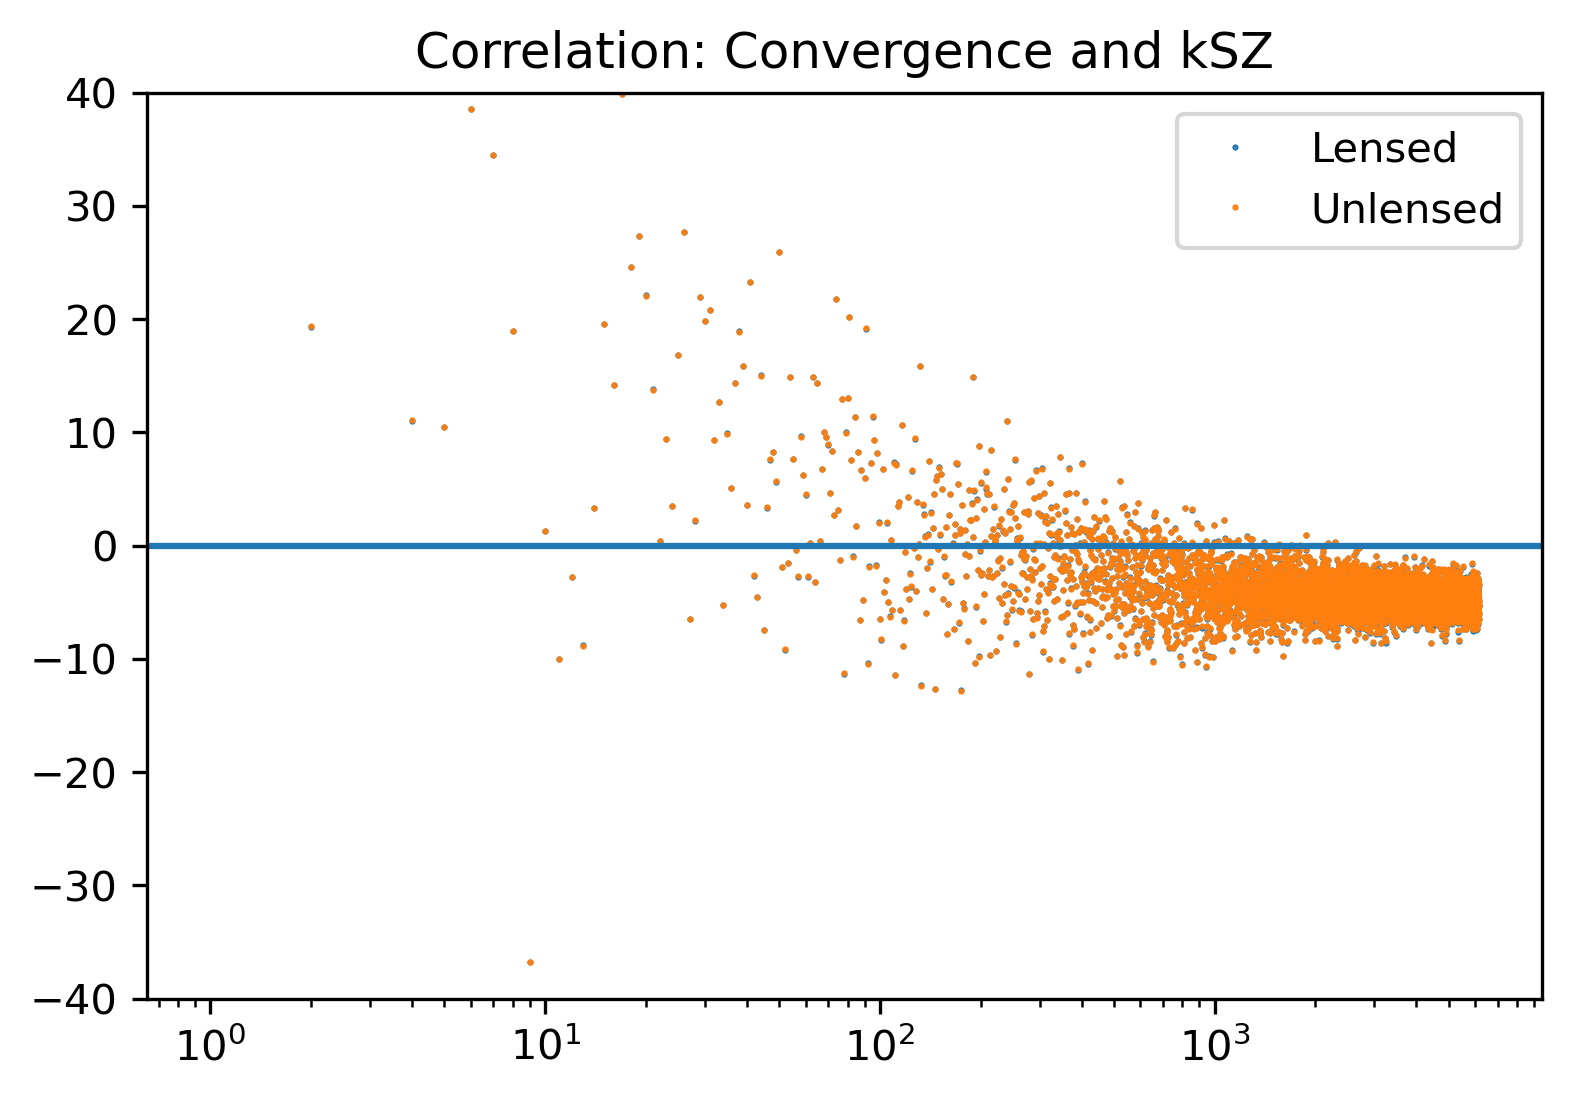

In [32]:
plt.figure(dpi=300)
plt.plot(correlationLenskxkSZ*100,".",markersize=1);
plt.plot(correlationUnLenskxkSZ*100,".",markersize=1);
plt.legend(loc=0, labels=["Lensed","Unlensed"])
plt.title("Correlation: Convergence and kSZ")
plt.semilogx()
plt.axhline(0)
plt.ylim(-40,40)
plt.show()